## Imports and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
# from drive (nothing need to copy)
!gdown https://drive.google.com/uc?id=1wZfHJT-kUGeppQ8g90RRq9-yROBW0I0q
df = pd.read_csv('BTC_USD_210101_220101.csv')

Downloading...
From: https://drive.google.com/uc?id=1wZfHJT-kUGeppQ8g90RRq9-yROBW0I0q
To: /content/BTC_USD_210101_220101.csv
100% 7.91M/7.91M [00:00<00:00, 72.1MB/s]


## EDA

In [3]:
df

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20210101,500,29181.00,29192.69,29000.00,29032.43,199
1,20210101,1000,29030.13,29046.50,28946.22,29042.15,88
2,20210101,1500,29042.16,29088.00,29025.42,29088.00,43
3,20210101,2000,29087.99,29198.98,29081.51,29191.54,88
4,20210101,2500,29193.04,29198.73,29100.00,29129.63,116
...,...,...,...,...,...,...,...
105382,20220101,234500,47464.67,47466.99,47407.49,47421.64,20
105383,20220101,235000,47421.43,47490.73,47409.14,47410.16,22
105384,20220101,235500,47410.16,47417.51,47368.59,47405.17,23
105385,20220102,0,47405.17,47450.00,47399.34,47413.98,20


In [4]:
df.columns = ['date', 'time', 'open', 'high', 'low', 'close', 'vol']

In [5]:
df.insert(1, 'year', df.date // 10000)
df.insert(2, 'month', df.date % 10000 // 100)
df.insert(3, 'day', df.date % 100)

In [6]:
m_to_d_ = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
m_to_d = []
sum = 0
for i in m_to_d_:
    sum += i
    m_to_d.append(sum)
display(m_to_d)

dfs = []
for i in range(df.shape[0]):
    dfs.append((df.year[i] - 2021) * 365 + m_to_d[df.month[i] - 1] + df.day[i] - 1)

df.insert(4, 'days_from_start', dfs)

[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]

In [7]:
df.insert(6, 'time_from_start', df.days_from_start + df.time / 250000)
df.sort_values('time_from_start')

,date,year,month,day,days_from_start,time,time_from_start,open,high,low,close,vol
0,20210101,2021,1,1,0,500,0.002,29181.00,29192.69,29000.00,29032.43,199
1,20210101,2021,1,1,0,1000,0.004,29030.13,29046.50,28946.22,29042.15,88
2,20210101,2021,1,1,0,1500,0.006,29042.16,29088.00,29025.42,29088.00,43
3,20210101,2021,1,1,0,2000,0.008,29087.99,29198.98,29081.51,29191.54,88
4,20210101,2021,1,1,0,2500,0.010,29193.04,29198.73,29100.00,29129.63,116
...,...,...,...,...,...,...,...,...,...,...,...,...
105382,20220101,2022,1,1,365,234500,365.938,47464.67,47466.99,47407.49,47421.64,20
105383,20220101,2022,1,1,365,235000,365.940,47421.43,47490.73,47409.14,47410.16,22
105384,20220101,2022,1,1,365,235500,365.942,47410.16,47417.51,47368.59,47405.17,23
105385,20220102,2022,1,2,366,0,366.000,47405.17,47450.00,47399.34,47413.98,20


In [8]:
df

,date,year,month,day,days_from_start,time,time_from_start,open,high,low,close,vol
0,20210101,2021,1,1,0,500,0.002,29181.00,29192.69,29000.00,29032.43,199
1,20210101,2021,1,1,0,1000,0.004,29030.13,29046.50,28946.22,29042.15,88
2,20210101,2021,1,1,0,1500,0.006,29042.16,29088.00,29025.42,29088.00,43
3,20210101,2021,1,1,0,2000,0.008,29087.99,29198.98,29081.51,29191.54,88
4,20210101,2021,1,1,0,2500,0.010,29193.04,29198.73,29100.00,29129.63,116
...,...,...,...,...,...,...,...,...,...,...,...,...
105382,20220101,2022,1,1,365,234500,365.938,47464.67,47466.99,47407.49,47421.64,20
105383,20220101,2022,1,1,365,235000,365.940,47421.43,47490.73,47409.14,47410.16,22
105384,20220101,2022,1,1,365,235500,365.942,47410.16,47417.51,47368.59,47405.17,23
105385,20220102,2022,1,2,366,0,366.000,47405.17,47450.00,47399.34,47413.98,20


In [9]:
df.describe()

,date,year,month,day,days_from_start,time,time_from_start,open,high,low,close,vol
count,1.053870e+05,105387.000000,105387.000000,105387.000000,105387.000000,105387.000000,105387.000000,105387.000000,105387.000000,105387.000000,105387.000000,105387.000000
mean,2.021069e+07,2021.002752,6.509892,15.680767,182.475960,117757.778474,182.946991,47375.425243,47456.217713,47293.272682,47375.667743,59.431344
std,6.023668e+02,0.052385,3.454867,8.817491,105.645921,69245.853331,105.646317,9809.570960,9810.013184,9808.454025,9809.381350,73.744598
min,2.021010e+07,2021.000000,1.000000,1.000000,0.000000,0.000000,0.002000,28811.950000,28915.590000,27678.000000,28815.640000,0.000000
25%,2.021040e+07,2021.000000,4.000000,8.000000,91.000000,60000.000000,91.455000,38118.940000,38214.825000,38020.475000,38118.785000,22.000000
50%,2.021070e+07,2021.000000,7.000000,16.000000,182.000000,120000.000000,182.926000,47902.330000,47971.280000,47833.250000,47902.600000,39.000000
75%,2.021100e+07,2021.000000,10.000000,23.000000,274.000000,180000.000000,274.419000,56201.555000,56300.000000,56112.540000,56201.855000,70.000000
max,2.022010e+07,2022.000000,12.000000,31.000000,366.000000,235500.000000,366.002000,68726.030000,69000.000000,68566.000000,68733.070000,2099.000000


## Some plots

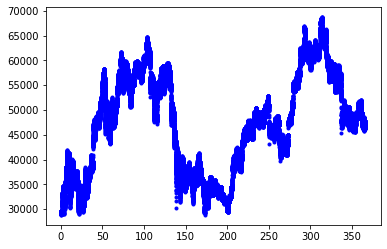

In [10]:
plt.plot(df.time_from_start, df.close, 'b.')

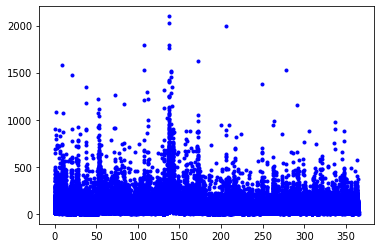

In [11]:
plt.plot(df.days_from_start, df.vol, 'b.')

In [12]:
df_time = df[df.time == 0]

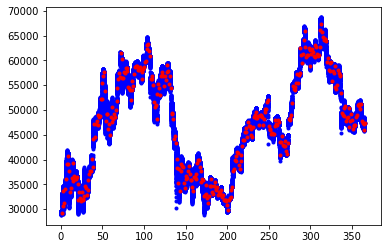

In [13]:
plt.plot(df.days_from_start, df.close, 'b.')
plt.plot(df_time.days_from_start, df_time.close, 'r.')

## Add lagged features

In [14]:
lagged = [0.02, 0.1, 1, 2, 3, 4, 5, 6, 7, 10, 14, 15, 20, 21, 25, 28, 30] # time

In [15]:
assert len(set(df['time_from_start'])) == df.shape[0]

In [16]:
low_dict = {}
high_dict = {}
close_dict = {}
vol_dict = {}

for i in range(df.shape[0]):
    low_dict[df.time_from_start[i]] = df.low[i]
    high_dict[df.time_from_start[i]] = df.high[i]
    close_dict[df.time_from_start[i]] = df.close[i]
    vol_dict[df.time_from_start[i]] = df.vol[i]

In [17]:
df

,date,year,month,day,days_from_start,time,time_from_start,open,high,low,close,vol
0,20210101,2021,1,1,0,500,0.002,29181.00,29192.69,29000.00,29032.43,199
1,20210101,2021,1,1,0,1000,0.004,29030.13,29046.50,28946.22,29042.15,88
2,20210101,2021,1,1,0,1500,0.006,29042.16,29088.00,29025.42,29088.00,43
3,20210101,2021,1,1,0,2000,0.008,29087.99,29198.98,29081.51,29191.54,88
4,20210101,2021,1,1,0,2500,0.010,29193.04,29198.73,29100.00,29129.63,116
...,...,...,...,...,...,...,...,...,...,...,...,...
105382,20220101,2022,1,1,365,234500,365.938,47464.67,47466.99,47407.49,47421.64,20
105383,20220101,2022,1,1,365,235000,365.940,47421.43,47490.73,47409.14,47410.16,22
105384,20220101,2022,1,1,365,235500,365.942,47410.16,47417.51,47368.59,47405.17,23
105385,20220102,2022,1,2,366,0,366.000,47405.17,47450.00,47399.34,47413.98,20


In [18]:
df_new = df[df.time_from_start >= lagged[-1]]
df_new = df_new.reset_index()

In [19]:
lags = [0]
for i in np.linspace(0.02, 1, 50):
    lags.append(i)
    lags.append(-i)

In [20]:
new_low = [[] for i in range(len(lagged))]
new_high = [[] for i in range(len(lagged))]
new_close = [[] for i in range(len(lagged))]
new_vol = [[] for i in range(len(lagged))]

for i in range(df_new.shape[0]):
    for j in range(len(lagged)):
        try:
            flag = False
            for q in lags:
                try:
                    new_low[j].append(low_dict[df_new.time_from_start[i] - lagged[j] - q])
                    new_high[j].append(high_dict[df_new.time_from_start[i] - lagged[j] - q])
                    new_close[j].append(close_dict[df_new.time_from_start[i] - lagged[j] - q])
                    new_vol[j].append(vol_dict[df_new.time_from_start[i] - lagged[j] - q])
                    flag = True
                    break
                except:
                    pass
            if not flag:
                a = 1 / 0
        except:
            new_low[j].append(np.nan)
            new_high[j].append(np.nan)
            new_close[j].append(np.nan)
            new_vol[j].append(np.nan)

In [21]:
assert len(new_vol[0]) == df_new.shape[0]

In [22]:
for i in range(len(lagged)):
    df_new['lagged_' + str(lagged[i]) + '_low'] = new_low[i]
    df_new['lagged_' + str(lagged[i]) + '_high'] = new_high[i]
    df_new['lagged_' + str(lagged[i]) + '_close'] = new_close[i]
    df_new['lagged_' + str(lagged[i]) + '_vol'] = new_vol[i]

In [23]:
df_new = df_new.dropna(axis = 0)
df_new

,index,date,year,month,day,days_from_start,time,time_from_start,open,high,...,lagged_25_close,lagged_25_vol,lagged_28_low,lagged_28_high,lagged_28_close,lagged_28_vol,lagged_30_low,lagged_30_high,lagged_30_close,lagged_30_vol
0,8639,20210131,2021,1,31,30,0,30.000,34277.35,34312.16,...,34067.74,238.0,30505.00,31612.42,30674.58,839.0,29003.61,29075.89,29046.01,61.0
32,8671,20210131,2021,1,31,30,24000,30.096,34375.58,34410.88,...,34048.79,60.0,31819.81,31929.29,31908.35,28.0,29308.40,29371.66,29360.59,7.0
37,8676,20210131,2021,1,31,30,30500,30.122,34315.63,34356.55,...,33935.50,151.0,32151.62,32280.00,32215.82,55.0,29353.55,29458.64,29388.62,35.0
40,8679,20210131,2021,1,31,30,32000,30.128,34264.97,34313.56,...,33680.50,168.0,32054.19,32204.70,32123.85,22.0,29250.54,29298.00,29297.99,59.0
48,8687,20210131,2021,1,31,30,40000,30.160,34062.23,34170.00,...,33976.94,87.0,32450.06,32509.32,32485.80,44.0,29232.65,29313.71,29258.58,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96743,105382,20220101,2022,1,1,365,234500,365.938,47464.67,47466.99,...,50414.60,100.0,49220.01,49551.71,49303.33,102.0,57125.59,57289.00,57230.51,76.0
96744,105383,20220101,2022,1,1,365,235000,365.940,47421.43,47490.73,...,50340.93,66.0,49211.19,49465.83,49250.03,81.0,57022.59,57240.77,57152.10,53.0
96745,105384,20220101,2022,1,1,365,235500,365.942,47410.16,47417.51,...,50320.30,64.0,49160.00,49350.24,49336.16,83.0,56922.07,57152.10,57032.00,31.0
96746,105385,20220102,2022,1,2,366,0,366.000,47405.17,47450.00,...,50472.66,56.0,49289.48,49465.77,49342.56,62.0,56968.01,57075.10,57075.10,44.0


## Check different algorithms
According to https://www.bankrate.com/banking/cds/cd-rates/ - the best APY (% of money we can get per year) is 2.6%. Our goal is to beat this result in the validation

### Some necessary things

In [24]:
def get_profit(start, predicted, end, percentage=0.1):
    a = pd.DataFrame({'start': start,
                      'pred': predicted,
                      'end': end,
                      'expected_profit': (predicted - start) / start,
                      'profit': (end - start)})
    a = a.sort_values('expected_profit')
    a = a[-round(percentage * a.shape[0]):]
    a = a[a.expected_profit > 0]
    return (a.end.sum() - a.start.sum()) / a.start.sum()

In [25]:
def get_year_percentage_profit(profit):
    # gets profit for the day
    return ((1 + profit)**365 - 1) * 100

In [26]:
X = df_new.drop(columns=['index', 'date', 'year', 'time', 'high', 'low', 'close', 'vol'])
y = df_new['close']

### XGBoost with cross-validation

In [ ]:
import xgboost as xgb
day_profits = []
for day in range(320, 360):
    X_train = X[X.days_from_start < day]
    y_train = y[X.days_from_start < day]

    X_test = X[X.days_from_start >= day][X.days_from_start <= day + 1]
    y_test = y[X.days_from_start >= day][X.days_from_start <= day + 1]
    
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    profit = get_profit(X_test.open, preds, y_test)
    day_profits.append(profit)

In [ ]:
print(get_year_percentage_profit(np.mean(np.array(day_profits)))) # seems good

13.925085162826957


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import time

day_profits = []
times = []
for day in range(320, 360):
    X_train = X[X.days_from_start < day]
    y_train = y[X.days_from_start < day]

    X_test = X[X.days_from_start >= day][X.days_from_start <= day + 1]
    y_test = y[X.days_from_start >= day][X.days_from_start <= day + 1]
    
    model = LinearRegression(normalize=True)
    model.fit(X_train, y_train)

    timing = time.time()
    preds = model.predict(X_test)
    times.append(time.time() - timing)

    profit = get_profit(X_test.open, preds, y_test)
    day_profits.append(profit)

In [28]:
print(get_year_percentage_profit(np.mean(np.array(day_profits)))) # seems better

98.57880011845464


In [32]:
print(np.mean((np.array(times) / X_test.shape[0]), axis=None) * 1000, 'ms - average time for prediction price')

0.011329477032025654 ms - average time for prediction price
